## META

In [1]:
!pip install numpy matplotlib pandas sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Data Exploration

In [2]:
dataframe = pd.read_csv('./insurance.csv')

In [3]:

scaler = StandardScaler()
dataframe['bmi'] = scaler.fit_transform(dataframe['bmi'].values.reshape(-1, 1))
dataframe['children'] = scaler.fit_transform(dataframe['children'].values.reshape(-1, 1))


X = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, -1].values

In [4]:
dataframe.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    float64
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 19.2 KB


In [6]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,-0.494245,-0.917371,1,3,16884.92400
1,18,1,0.550655,-0.077252,0,2,1725.55230
2,28,1,0.413590,1.602986,0,2,4449.46200
3,33,1,-1.418991,-0.917371,0,1,21984.47061
4,32,1,-0.319799,-0.917371,0,1,3866.85520


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58a698cd50>,
      dtype=object)

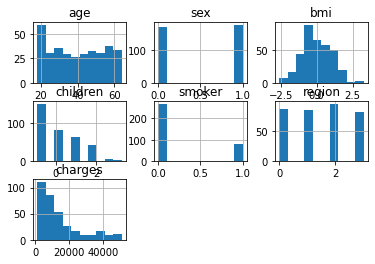

In [7]:
dataframe.hist()

## Data Preparation - Missing Data

In [8]:
dataframe.count() # Count counts non-NA values 

age         348
sex         348
bmi         348
children    348
smoker      348
region      348
charges     348
dtype: int64

There are no NULL values in our dataframe

In [9]:
dataframe.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,3.480000e+02,3.480000e+02,348.000000,348.000000,348.000000
mean,39.591954,0.508621,8.143231e-16,-1.276118e-16,0.232759,1.497126,14016.426293
std,14.417015,0.500646,1.001440e+00,1.001440e+00,0.423198,1.104089,12638.887852
min,18.000000,0.000000,-2.619647e+00,-9.173714e-01,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,-6.931679e-01,-9.173714e-01,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,-6.702879e-02,-7.725233e-02,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,7.299969e-01,7.628668e-01,0.000000,2.000000,19006.316150
max,64.000000,1.000000,3.272380e+00,3.283224e+00,1.000000,3.000000,51194.559140


## Data Preparation - Categorical Data 

In [10]:

ctohe = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ctohe.fit_transform(X))


## Data Division: Training and Test

## Three Models

### Without Sklearn

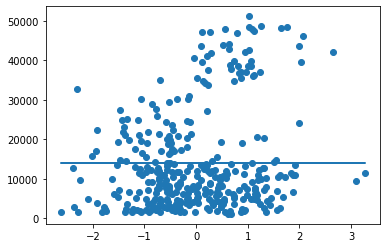


      Mean Absolute Error:  12620.71546659188
      R-Squared Score:      9.992007221626409e-16



In [11]:
def mean(arr):
  total = 0
  for val in arr:
    total+= val
  return total / len(arr)

def sum(arr):
  total = 0
  for a in arr:
    total += a
  return total

def predict(x, y):
  m_x = mean(x)
  n = len(x)
  m_y = mean(y)
  y_r, x_r = y*x, x*x
  SS_xy = sum(y*x) - n*m_y*m_x
  SS_XX = sum(x*x) - n*m_x*m_x
  b_1 = SS_xy / SS_XX
  b_0 = m_y - b_1 * m_x
  return (b_0, b_1)

X_single = dataframe['bmi']
coeff = predict(X_single.values.reshape(-1, 1), y)

y_pred = coeff[0] + coeff[1]*X_single

plt.scatter(X_single, y)
plt.plot(X_single, y_pred)
plt.show()
print(f'''
      Mean Absolute Error:  {np.sqrt(metrics.mean_squared_error(y, y_pred))}
      R-Squared Score:      {metrics.r2_score(y, y_pred)}
''')

### With Sklearn

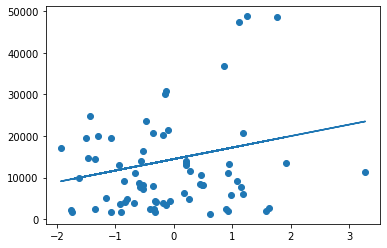


      Mean Absolute Error:  10970.647108135085
      R-Squared Score:      -0.010484969659761978



In [12]:
np.set_printoptions(precision=2)



regressor = LinearRegression()

# One variable training
X_single = dataframe['bmi']

X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single.values.reshape(-1, 1), y, test_size = 0.2, random_state = 0)

regressor.fit(X_train_single, y_train_single)
y_pred_single = regressor.predict(X_test_single)


plt.scatter(X_test_single, y_test_single)
plt.plot(X_test_single, y_pred_single)
plt.show()

print(f'''
      Mean Absolute Error:  {np.sqrt(metrics.mean_squared_error(y_test_single, y_pred_single))}
      R-Squared Score:      {metrics.r2_score(y_test_single, y_pred_single)}
''')

### With all Features

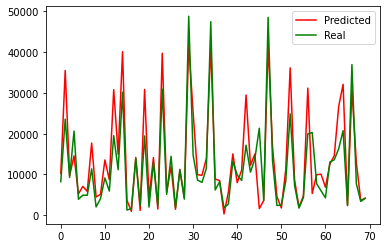


      Mean Absolute Error:  5846.761369465252
      R-Squared Score:      0.7129906104380308



In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


proto_regressor = LinearRegression()


proto_regressor.fit(X_train, y_train)
y_pred = proto_regressor.predict(X_test)


plt.plot(y_pred, color='red', label='Predicted')
plt.plot(y_test, color='green', label='Real')
plt.legend(loc='upper right')

plt.show()

print(f'''
      Mean Absolute Error:  {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}
      R-Squared Score:      {metrics.r2_score(y_test, y_pred)}
''')


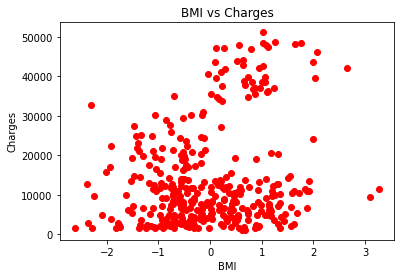

In [14]:
X_poly_features = dataframe['bmi'] 


plt.scatter(X_poly_features, dataframe['charges'], color='red')
plt.title('BMI vs Charges')
plt.ylabel('Charges')
plt.xlabel('BMI')
plt.show()

poly_reg = PolynomialFeatures()


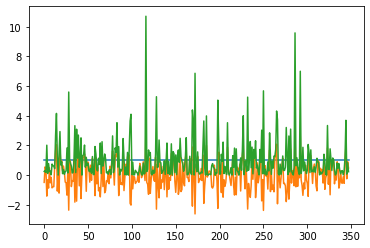

In [15]:
X_poly = poly_reg.fit_transform(X_poly_features.values.reshape(-1, 1))
plt.plot(X_poly)
plt.show()

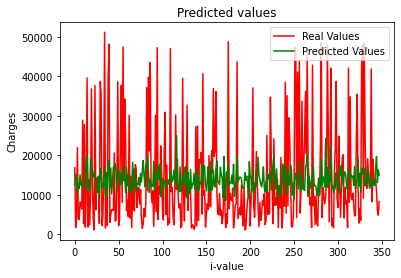


      Mean Absolute Error:  12334.37658283408
      R-Squared Score:      0.04486126878855068
      


In [16]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred = lin_reg_2.predict(X_poly)

plt.plot(y, color='red', label='Real Values')
plt.plot(y_pred, color='green', label='Predicted Values')
plt.title('Predicted values')
plt.ylabel('Charges')
plt.xlabel('i-value')
plt.legend(loc='upper right')
plt.show()
print(f'''
      Mean Absolute Error:  {np.sqrt(metrics.mean_squared_error(y, y_pred))}
      R-Squared Score:      {metrics.r2_score(y, y_pred)}
      ''')